<a href="https://colab.research.google.com/github/kiran081105-creator/supply_chain_analysis/blob/main/shipping__time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("supply_chain.csv", encoding='latin-1')

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,171687.000000,171687.000000,171687.000000,171687.000000,171687.000000,171687.000000,171687.000000,171684.000000,171687.000000,171687.000000,...,171686.000000,171686.000000,171686.000000,171686.000000,23906.000000,171686.000000,171686.000000,0.0,171686.000000,171686.0
mean,3.515444,2.950101,21.894267,182.553215,0.545539,31.890953,6697.963765,36915.883641,5.444512,30.032770,...,2.109904,203.171033,182.553553,21.894122,55580.782691,693.321447,31.890999,NaN,141.669856,0.0
std,1.620259,1.364223,104.270036,119.937866,0.497923,15.672268,4171.202484,37598.416060,1.630483,9.758218,...,1.445763,132.215348,119.938133,104.270322,31895.927287,336.912549,15.672302,NaN,139.657829,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,6.960000,104.370003,0.000000,18.000000,3255.500000,725.000000,4.000000,18.268909,...,1.000000,119.980003,104.370003,6.960000,23602.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.459999,163.990005,1.000000,29.000000,6461.000000,21215.000000,5.000000,33.492680,...,1.000000,199.919998,163.990005,31.459999,60016.000000,627.000000,29.000000,NaN,79.989998,0.0
75%,5.000000,4.000000,64.650002,245.979996,1.000000,45.000000,9789.000000,78572.000000,7.000000,39.398541,...,3.000000,299.950012,245.979996,64.650002,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,864.000000,1919.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1919.989990,864.000000,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
df = df.drop_duplicates()
df = df.dropna(subset=["Days for shipping (real)"])


In [ ]:
df["order_date"] = pd.to_datetime(df["order date (DateOrders)"], errors="coerce")
df["order_month"] = df["order_date"].dt.month.fillna(0)
df["order_weekday"] = df["order_date"].dt.weekday.fillna(0)
df["order_year"] = df["order_date"].dt.year.fillna(0)


In [ ]:
features = [
    "Days for shipment (scheduled)",
    "Order Item Product Price",
    "Order Item Quantity",
    "Order Item Discount Rate",
    "Sales",
    "Product Price",
    "order_month",
    "order_weekday",
    "Order Region",
    "Order State",
    "Shipping Mode"
]

target = "Days for shipping (real)"

X = df[features]
y = df[target]


In [ ]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        random_state=42
    ))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Days for shipment '
                                                   '(scheduled)',
                                                   'Order Item Product Price',
                                                   'Order Item Quantity',
                                                   'Order Item Discount Rate',
                                                   'Sales', 'Product Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Order Region',
                                                   'Order State',
                                                   'Shipping Mode'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, n_estimators=200,
                                       random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE : 0.9847170495434098
RMSE: 1.268361678781079
R² Score: 0.38826219384093485


shipping time prediction model shows moderate accuracy, with a Mean Absolute Error (MAE) of 0.98 days, meaning the model’s predicted shipping time differs from the actual time by about 1 day on average. The RMSE of 1.26 days indicates that large errors (outliers) are slightly higher but still within a reasonable range for supply chain forecasting. However, the R² score of 0.38 reveals that the model explains only 38% of the variance in shipping time, suggesting that shipping duration is influenced by several factors not captured in the current feature set—such as carrier performance, warehouse processing times, route distance, real-time traffic, weather, and operational delays. In summary, while the model provides fairly reliable day-level estimates, it lacks deeper predictive power due to missing operational features, and improving the dataset with more logistics-specific inputs could significantly enhance accuracy.

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

target_col = "Days for shipping (real)"
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found. Columns: {df.columns.tolist()}")

# parse date (if present)
if "order date (DateOrders)" in df.columns:
    df["order_date"] = pd.to_datetime(df["order date (DateOrders)"], errors="coerce")
    df["order_month"] = df["order_date"].dt.to_period("M")

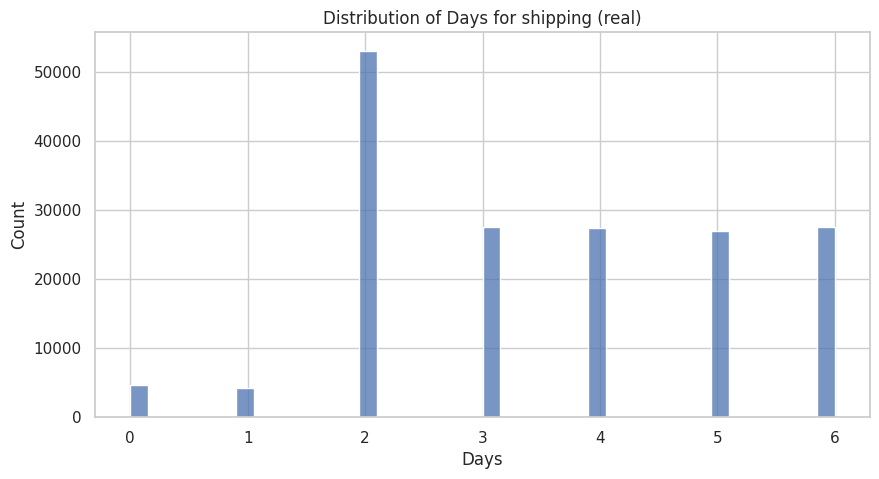

In [ ]:
plt.figure()
sns.histplot(df[target_col].dropna(), bins=40)
plt.title("Distribution of Days for shipping (real)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

The distribution shows that most orders take 2 to 6 days for shipping, with 2 days being the most common shipping time by a large margin. Very few orders take 0 or 1 day, indicating that same-day or next-day deliveries are rare. Overall, shipping times are clustered tightly between 2–6 days, meaning the supply chain is fairly consistent but may still have occasional delays on the higher end.

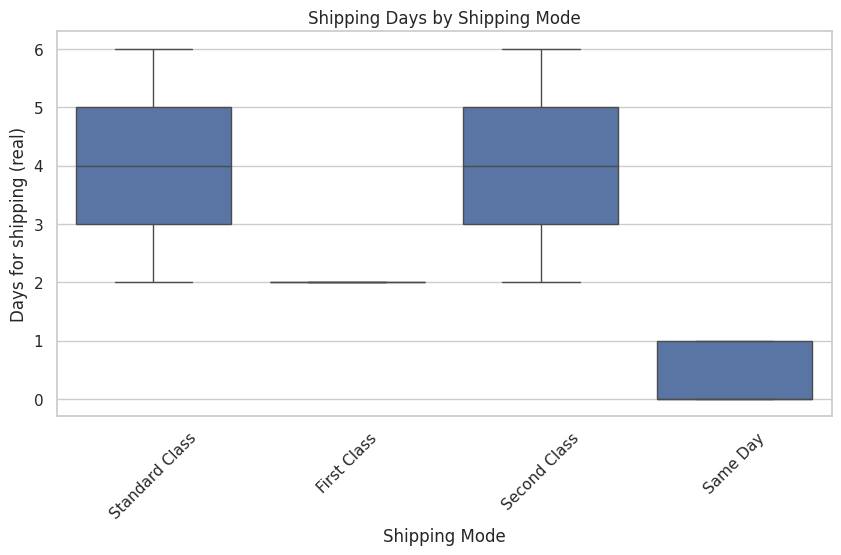

In [ ]:
if "Shipping Mode" in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x="Shipping Mode", y=target_col, data=df)
    plt.title("Shipping Days by Shipping Mode")
    plt.xlabel("Shipping Mode")
    plt.ylabel("Days for shipping (real)")
    plt.xticks(rotation=45)
    plt.show()


Shipping time varies significantly by shipping mode. Same Day deliveries are the fastest with delivery almost always completed within 0–1 days. First Class consistently delivers in about 2 days with very low variation. Standard Class and Second Class take longer—typically 3–5 days, with Second Class showing slightly more delays and higher variability. Overall, faster shipping modes are far more reliable and consistent, while Standard and Second Class contribute most to longer shipping times.

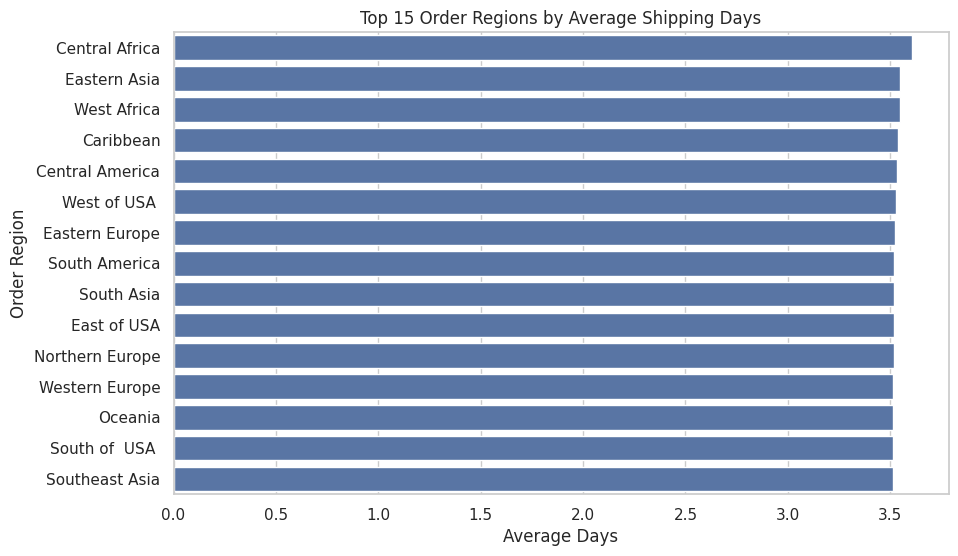

In [ ]:
if "Order Region" in df.columns:
    agg = df.groupby("Order Region")[target_col].mean().dropna().sort_values(ascending=False)
    top = agg.head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top.values, y=top.index)
    plt.title("Top 15 Order Regions by Average Shipping Days")
    plt.xlabel("Average Days")
    plt.ylabel("Order Region")
    plt.show()

The regions with the highest average shipping times are primarily international and geographically distant areas, with Central Africa, Eastern Asia, and West Africa showing the longest delivery durations, averaging just above 3.5 days. Other regions such as the Caribbean, Central America, and Eastern Europe also fall within the top delay-prone zones. Even developed regions like Western Europe, Northern Europe, and Oceania exhibit similar shipping averages, suggesting that cross-border logistics—rather than regional economic status—drive higher shipping times. Overall, the chart highlights that international and long-distance regions consistently require more delivery time, making them key areas for optimizing carriers, routes, and logistics planning.